Final Física Teórica 1 \
Daiana Dominikow - 2022 \
L.32529 \
Fuerzas centrales, método de Euler

In [11]:
import math
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def movimiento_dos_cuerpos(masa1, masa2, distancia, tiempo, dt):
        
    #entran por parametro
    m1 = masa1 #masa de la primer estrella
    m2 = masa2 #masa de la segunda estrella
    d = distancia #distancia entre las estrellas
    tf = tiempo  
    dt = dt

    #cálculos
    t = np.arange(0 , tf + dt ,dt)
    t_len = len(t) - 1
    M = m1+m2 
    mu = m1*m2/M #masa reducida
    #posición centros de masa
    x1 = -(m2/M)*d
    x2 = (m1/M)*d
    #posicion masas
    pos1_inicial = np.array([x1,0,0])
    pos2_inicial = np.array([x2,0,0])
    r = pos2_inicial - pos1_inicial

    #centro de masa
    cm = (pos1_inicial*m1 + pos2_inicial*m2)/M

    #ahora, les tengo que dar un momento inicial a ambas estrellas
    #solo necesito la velocidad  de una de ellas
    v_1 = math.sqrt(scipy.constants.G * m2 * np.linalg.norm(pos1_inicial)/np.linalg.norm(r)**2)
    #para una orbita circular
    v1_inicial = np.array([0,v_1,0])

    #por conservacion del momento
    p1_inicial = m1*v1_inicial
    p2_inicial=-p1_inicial
    g_cte = -scipy.constants.G*m1*m2
    l = np.linalg.norm(np.cross(pos1_inicial,p1_inicial) + np.cross(pos2_inicial,p2_inicial))  
    energia_potencial(pos1_inicial,pos2_inicial, mu, p1_inicial, p2_inicial, g_cte, l, t_len)
    posicion_velocidad(pos1_inicial, pos2_inicial, m1, m2,p1_inicial, p2_inicial, g_cte, t_len)

In [13]:
def energia_potencial(m1_pos, m2_pos,mu, m1_p, m2_p, g_cte, l, t_len ):
    i=0
    Ug = []
    Uc = []
    Uef = []
    star1=m1_pos
    star2=m2_pos
    r = m2_pos - m1_pos
    r_norm = []
    star1p = m1_p
    star2p = m2_p

    while i<t_len:
        r = star2 - star1
        r_norm.append(np.linalg.norm(r))
        F2 = g_cte/r_norm[i]**2
        star1p = star1p - F2*dt
        star2p = star2p + F2*dt
        star1 = star1 + (star1p*dt)/m1
        star2 = star2 + (star2p*dt)/m2

        Ug.append(g_cte/r_norm[i])
        Uc.append(l**2/(2*mu*r_norm[i]**2))
        Uef.append(Uc[i]+ Ug[i])
        
        i=i+1


    plt.figure(1)    
    plt.plot(r_norm,Ug,'green',label='Ug')
    plt.plot(r_norm,Uc,'blue',label='Uc')
    plt.plot(r_norm,Uef,'red',label='Uef')
    plt.xlabel("Distancia")
    plt.ylabel("Energia potencial")   
    plt.legend()
    plt.show()

In [14]:
def posicion_velocidad(m1_pos, m2_pos, m1, m2, m1_p, m2_p, g_cte, t_len):
    i = 0
    r_norm = []
    r = m2_pos - m1_pos
    r_norm = []
    r_norm.append(np.linalg.norm(r))
    star1p = m1_p 
    star2p = m2_p
    star1 = m1_pos
    star2= m2_pos

    while i<t_len:
        r_uni = r / r_norm[i]
        F2 = g_cte*r_uni/r_norm[i]**2
        star1p = star1p - F2*dt
        star2p = star2p + F2*dt
        star1 = star1 + (star1p*dt)/m1
        star2 = star2 + (star2p*dt)/m2
        r = star2 - star1
        r_norm.append(np.linalg.norm(r))

        plt.figure(1)
        plt.plot(i,r_norm[i],'.')
        plt.xlabel("Intervalo de tiempo")
        plt.ylabel("Posicion")

        plt.figure(2)
        plt.plot(i,np.linalg.norm(star2p/m2),'.r')
        plt.plot(i,np.linalg.norm(star1p/m1),'.b')
        plt.xlabel("Intervalo de tiempo")
        plt.ylabel("Velocidad")

        i=i+1

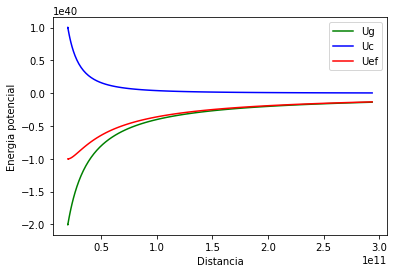

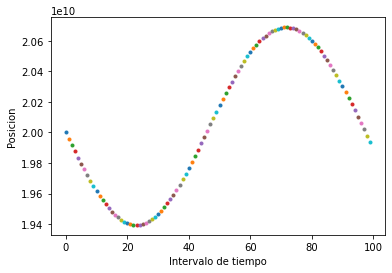

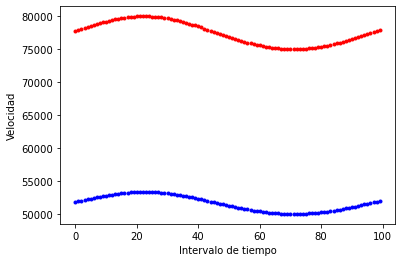

In [15]:
#prueba    1: valores random 
m1 = 3e30 #masa de la primer estrella
m2 = 2e30 #masa de la segunda estrella
d = 2e10 #distancia entre las estrellas
tf = 1e6  
dt = 1e4

movimiento_dos_cuerpos(m1,m2,d,tf,dt)

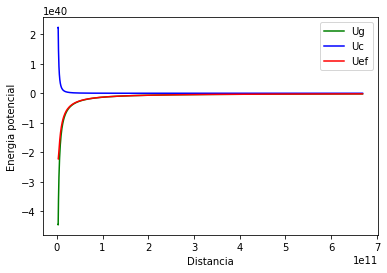

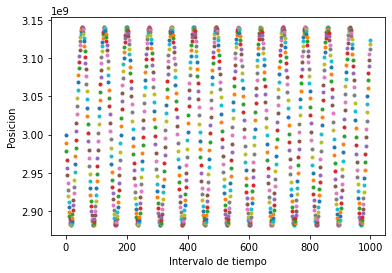

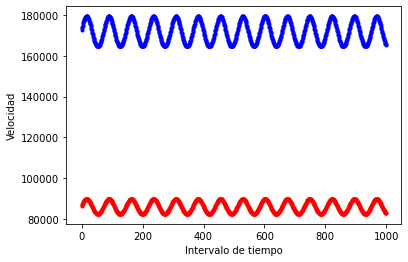

In [17]:
#prueba 2: Sistema de estrellas Sirius!!
m1 = 1e30 #masa de la primer estrella
m2 = 2e30 #masa de la segunda estrella
d = 3e9 #distancia entre las estrellas
tf = 1e6  
dt = 1e3

movimiento_dos_cuerpos(m1,m2,d,tf,dt)